In [18]:
import twstock # twstock是台灣股市的專用模組

### Stock物件的屬性(可以讀取指定的歷史資料):
* date:日期
* capacity:總成交股數(單位:股)
* turnover:總成交金額(單位:元)
* open:開盤價
* height:高盤價
* low:低盤價
* price:收盤價
* close:收盤價
* change:漲跌價差
* turnsaction:成交筆數

In [20]:
stock = twstock.Stock('2330')# 查詢股票代號
# 取得最近一天的股票交易(六日不交易)
print("日期: ",stock.date[-1])
print("開盤價: ",stock.open[-1])
print("最高價: ",stock.high[-1])
print("最低價: ",stock.low[-1])
print("收盤價: ",stock.price[-1])

日期:  2023-09-28 00:00:00
開盤價:  523.0
最高價:  525.0
最低價:  520.0
收盤價:  523.0


### Stock物件也提供fecth方法，可以讀取指定期間的歷史資料。
* fecth(西元年,月份):傳回叄數指定月份的資料。
* fecth_from(西元年，月份):傳回叄數指定月份到現在的資料。
* frcth_31():傳回最近31日的資料。

In [21]:
stocklist = stock.fetch(2019,2)# 取得2019年2月份的資料
# 把資料排列下來
for s in stocklist:
    print(s.date.strftime("%Y-%m-%d"),end=" ")# 日期
    print(s.open,end="\t")# 開盤價
    print(stock.high,end="\t")# 高盤價
    print(stock.low,end="\t")# 低盤價
    print(stock.price,end="\t")# 收盤價
    print(s.close)

2019-02-11 228.0	[229.0, 230.0, 232.0, 230.0, 229.0, 230.5, 230.5, 234.5, 236.5, 236.5, 239.0, 240.0, 239.5]	[226.5, 229.0, 228.5, 226.0, 226.5, 228.5, 229.0, 231.0, 234.5, 234.0, 236.0, 236.5, 237.0]	[228.0, 230.0, 229.0, 227.0, 227.0, 230.0, 229.0, 234.5, 236.5, 236.5, 238.0, 239.5, 239.0]	228.0
2019-02-12 230.0	[229.0, 230.0, 232.0, 230.0, 229.0, 230.5, 230.5, 234.5, 236.5, 236.5, 239.0, 240.0, 239.5]	[226.5, 229.0, 228.5, 226.0, 226.5, 228.5, 229.0, 231.0, 234.5, 234.0, 236.0, 236.5, 237.0]	[228.0, 230.0, 229.0, 227.0, 227.0, 230.0, 229.0, 234.5, 236.5, 236.5, 238.0, 239.5, 239.0]	230.0
2019-02-13 232.0	[229.0, 230.0, 232.0, 230.0, 229.0, 230.5, 230.5, 234.5, 236.5, 236.5, 239.0, 240.0, 239.5]	[226.5, 229.0, 228.5, 226.0, 226.5, 228.5, 229.0, 231.0, 234.5, 234.0, 236.0, 236.5, 237.0]	[228.0, 230.0, 229.0, 227.0, 227.0, 230.0, 229.0, 234.5, 236.5, 236.5, 238.0, 239.5, 239.0]	229.0
2019-02-14 229.5	[229.0, 230.0, 232.0, 230.0, 229.0, 230.5, 230.5, 234.5, 236.5, 236.5, 239.0, 240.0, 2

### 查詢股票即時交易資訊
* twstock也可以用realtime.get()查詢個股即時股票資訊。

In [23]:
real = twstock.realtime.get('2330')
print(real)

{'timestamp': 1695882600.0, 'info': {'code': '2330', 'channel': '2330.tw', 'name': '台積電', 'fullname': '台灣積體電路製造股份有限公司', 'time': '2023-09-28 14:30:00'}, 'realtime': {'latest_trade_price': '523.0000', 'trade_volume': '7227', 'accumulate_trade_volume': '19652', 'best_bid_price': ['522.0000', '521.0000', '520.0000', '519.0000', '518.0000'], 'best_bid_volume': ['975', '1054', '1369', '578', '566'], 'best_ask_price': ['523.0000', '524.0000', '525.0000', '526.0000', '527.0000'], 'best_ask_volume': ['44', '1237', '1295', '556', '504'], 'open': '523.0000', 'high': '525.0000', 'low': '520.0000'}, 'success': True}


In [1]:
# 實戰台灣股市個股單月股價走勢圖
import matplotlib.pyplot as plt
import twstock

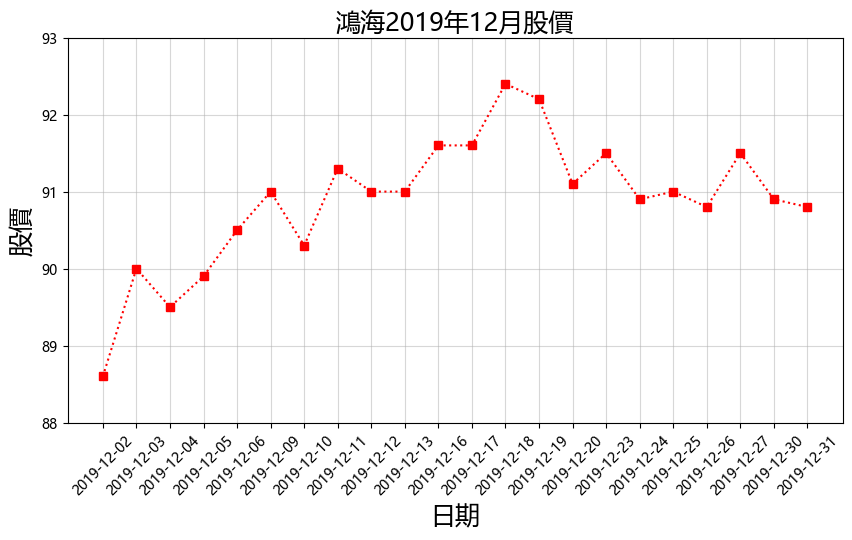

In [13]:
# 以台積電為股票代號建立Stock物件
stock = twstock.Stock('2317')
# 取得2019年12月的資料
stocklist = stock.fetch(2019,12)
listx = []
listy = []
for s in stocklist:
    listx.append(s.date.strftime("%Y-%m-%d"))
    listy.append(s.close)

plt.figure(figsize=[10,5])# 設定圖表的大小
plt.rcParams['font.sans-serif'] = 'Microsoft Yahei'
plt.rcParams['axes.unicode_minus'] = False
plt.title("鴻海2019年12月股價",fontsize=18)
plt.xlabel("日期",fontsize=18)
plt.ylabel("股價",fontsize=18)
plt.plot(listx,listy,'r:s')
plt.xticks(rotation=45)
plt.grid('k:',alpha=0.5)
plt.ylim(88,93)
plt.yticks([88,89,90,91,92,93])
plt.show() 